### Analisis inicial

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset y hacer un resumen
df = pd.read_csv("../datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [36]:
# Describir
print("DESCRIBE:\n", df.describe())
print("SHAPE:\n", df.shape)
print("INFO:\n", df.info())
print("DTYPES:\n", df.dtypes)
print("CANTIDAD NULOS:", df.isnull().sum())
print("CANTIDAD DUPLICADOS:", df.duplicated().sum())

DESCRIBE:
          Survived      Pclass         Age       SibSp       Parch        Fare  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     0.382452    2.311586   35.686355    0.524184    0.382452   32.096681   
std      0.486260    0.834700   17.756733    1.103705    0.806761   49.697504   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800   
50%      0.000000    3.000000   32.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   54.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked  
count  889.000000  
mean     2.535433  
std      0.792088  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      3.000000  
SHAPE:
 (889, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries,

# Visualiaciones

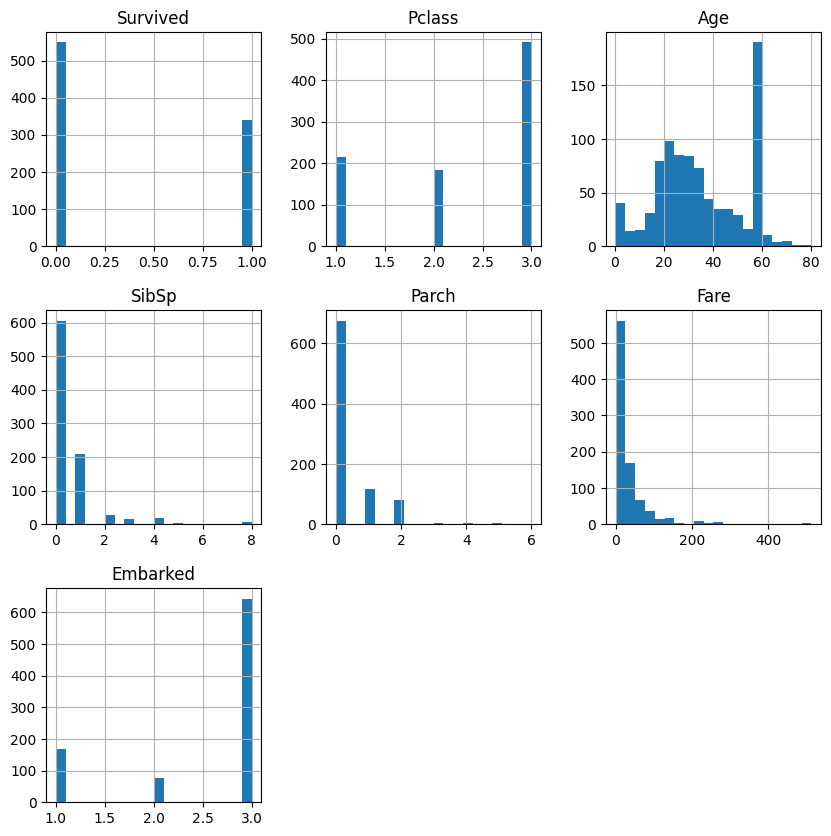

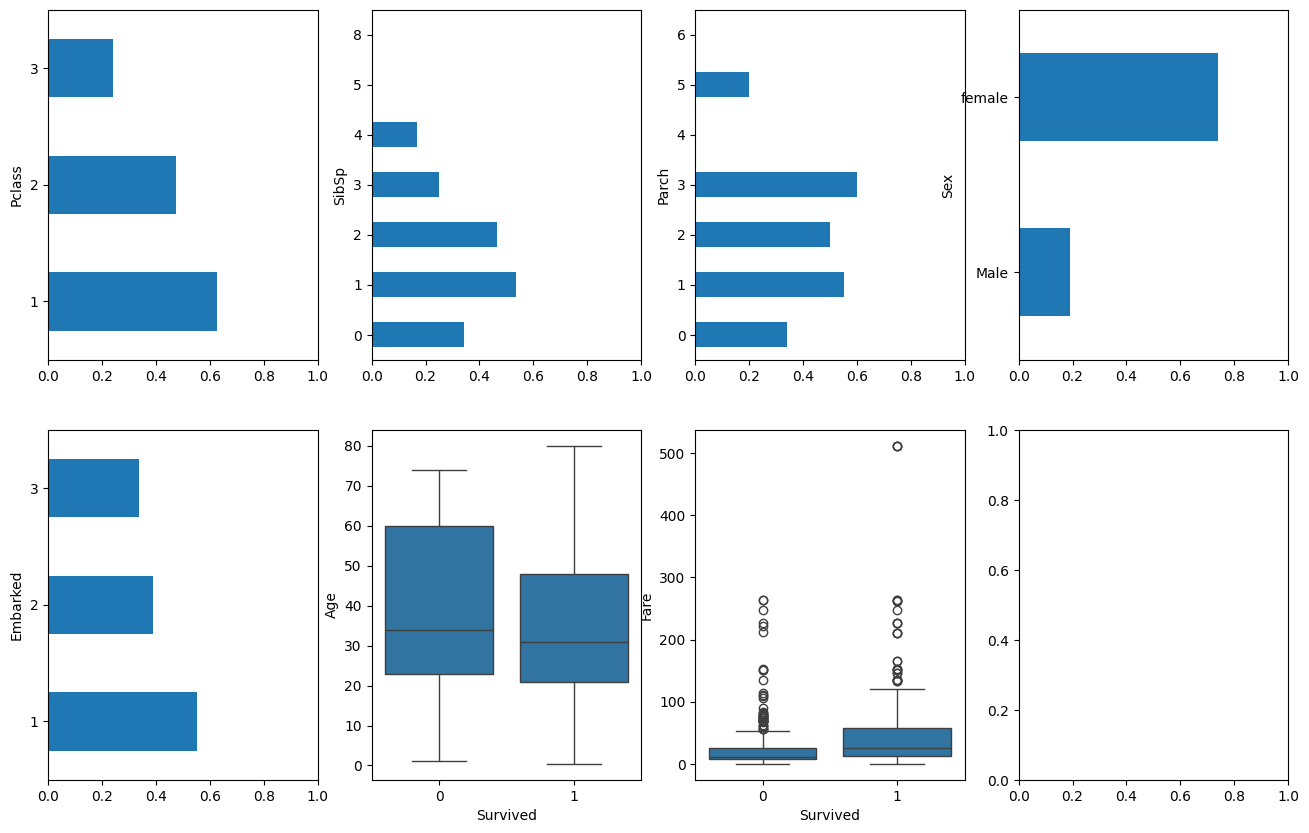

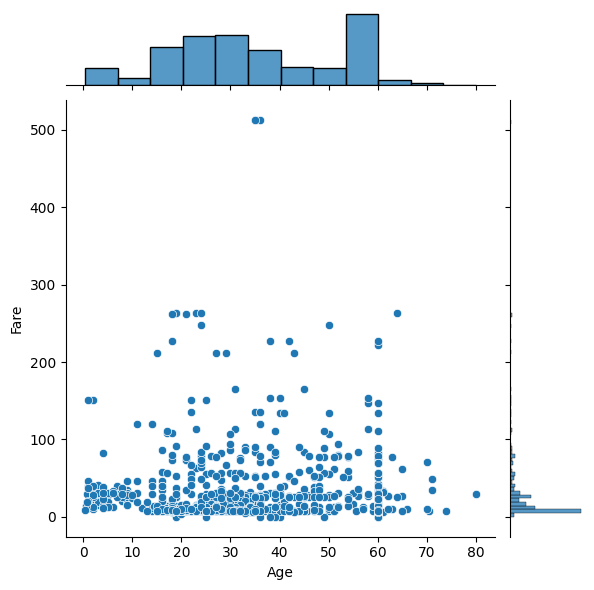

In [ ]:
# df = df.drop(columns=['PassengerId'])

# Creamos un histograma la para distribucion de los datos
df.hist(bins=20, figsize=(10, 10))
plt.show()


figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
df.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
df.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
df.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
df.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
df.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df,ax=axesbi[1,2])

sns.jointplot(x="Age", y="Fare", data=df)

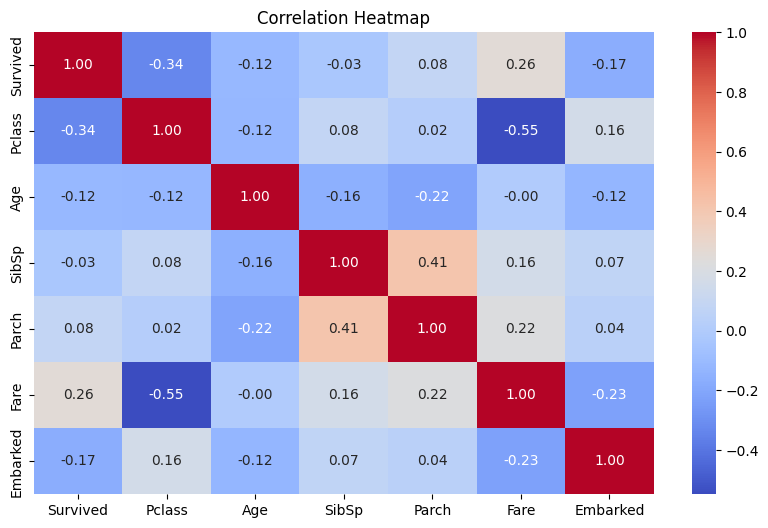

In [35]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()